<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [2]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [4]:
'''dataset = (dataset/255.0 - 0.5).astype(np.float16)
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]'''

number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

def data_preprocessing(data):
  dataout = (data/255.0).astype(np.float16)
  return dataout


8 [[0.6587 0.549  0.651  ... 0.1765 0.1921 0.1726]
 [0.5176 0.451  0.537  ... 0.1921 0.1686 0.1882]
 [0.502  0.4392 0.4548 ... 0.196  0.1843 0.3137]
 ...
 [0.1921 0.1921 0.2    ... 0.6313 0.3293 0.149 ]
 [0.2079 0.2627 0.204  ... 0.4746 0.2666 0.1804]
 [0.51   0.392  0.2588 ... 0.1569 0.1686 0.204 ]]


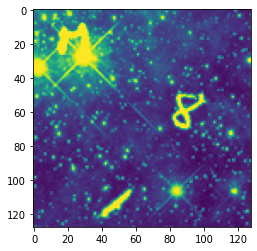

In [5]:
i = np.random.randint(0, X_train.shape[0])
sample = data_preprocessing(X_train)[i]
print(Y_train[i], sample)
plt.imshow(sample.astype(np.float32))

[[0.2196 0.2354 0.2471 0.2588 0.2705 0.4236 0.2942 0.2079 0.2118 0.2235
  0.357  0.5923 0.204  0.3804 0.545  0.2274 0.2903 0.302  0.2235 0.3176
  0.353  0.2588 0.2627 0.251  0.2705 0.2783 0.353  0.702  0.4038 0.255 ]
 [0.2432 0.2118 0.2354 0.251  0.2313 0.2393 0.2432 0.2274 0.1882 0.1921
  0.2393 0.3215 0.1647 0.4038 0.6274 0.2118 0.2157 0.3333 0.3293 0.4666
  0.3608 0.2354 0.2432 0.2471 0.251  0.2588 0.255  0.2942 0.2666 0.2666]
 [0.2666 0.2235 0.2118 0.2432 0.2393 0.204  0.2627 0.2235 0.204  0.204
  0.1882 0.2864 0.6235 0.2783 0.2196 0.2079 0.1882 0.2196 0.3687 0.3843
  0.2118 0.2471 0.2744 0.2354 0.2313 0.2313 0.2274 0.2313 0.2235 0.2588]
 [0.2354 0.2313 0.2157 0.2313 0.2118 0.204  0.2313 0.2274 0.1843 0.1804
  0.204  0.2627 0.5527 0.2588 0.1882 0.1804 0.1921 0.1843 0.2432 0.4
  0.3843 0.2393 0.2313 0.3254 0.2354 0.2354 0.255  0.2157 0.2196 0.2196]
 [0.306  0.2354 0.2118 0.2313 0.2157 0.2118 0.2079 0.1882 0.2079 0.204
  0.2079 0.2354 0.1765 0.2    0.2    0.2079 0.2313 0.196  0.204  

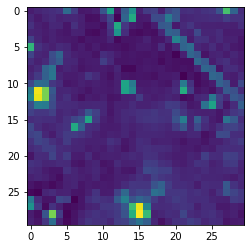

In [6]:
display = sample[55:85, 40:70]
plt.imshow(display.astype(np.float32))
print(display)

(40000, 128, 128) (10000, 128, 128)


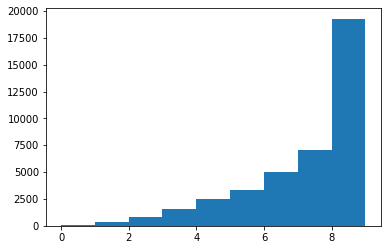

In [7]:
#X_train = np.expand_dims(X_train, axis=3)
#X_test = np.expand_dims(X_test, axis=3)

#print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train = b

b = np.zeros((Y_test.size, Y_test.max()+1))
b[np.arange(Y_test.size),Y_test] = 1
Y_test = b

def data_preprocessing2(data):
  dataout = (data/255.0)
  #dataout = np.expand_dims(dataout, axis=3)
  return dataout

print(data_preprocessing2(X_train).shape, data_preprocessing2(X_test).shape)

# ***Pipeline X***

(128, 128) [168 140 166 146 130 147 142 168 131 124 125 131 126 116 114 111 108 107
 123 188 223 163 148 133 127 130 119 107  97  97  95  86 103 134 129 121
 133 128 108 134  99  76  82  82  81  84  88  88 135  77  66  77  86  81
 107  94  88 119  99  88  89  95 124 128 109  96 109 105 100 102 104 109
 109 118 118 109 115 108 122  97  89  98  88  95  90  77  69  71  77  65
  69  66  56  62  61  58  59  62  62  57  54  56  56  54  55  54  56  63
  70  59  59  55  54  53  52  48  49  50 185 161  44  49  48  39  40  45
  49  44]
28 (28, 28, 3)


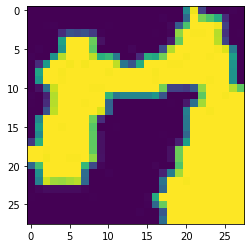

In [53]:
import cv2
def value_crop(input_im, output_size=(28,28), max_detection=3):
  if np.max(input_im) <= 2:
    input_im = (input_im*255).astype(np.uint8)
  print(input_im.shape, input_im[0])
  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None

  contour_info = []
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
       continue
    else:
      contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
      contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)
  #point1 = contour_info[2][0]
  #point2 = contour_info[2][1]
  #plt.imshow(black_white[point1[1]:point2[1], point1[0]:point2[0]])

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    
    # Padding to have max_detection
    padding = max_detection - len(contour_info)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    for contour in contour_info[:3]:
      #print("Here 2")
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)     

  return cropped_section

output = value_crop(sample, output_size=(28,28))
print(len(output), output.shape)
plt.imshow(output[:,:,np.random.randint(0, output.shape[2])])

In [54]:
def pipeline_X(data):
  print(data.shape)
  dataout = None
  for each_image in data:
    new_detection = value_crop(each_image)
    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        #print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
  return dataout

result = pipeline_X(X_train)
print(result.shape)


(40000, 128, 128)
(128, 128) [144 153 161 168 174 178 178  90   0   3  13  21  27  36  44  51  61  69
  74  82  91  98 107 113 121 129 137 145 154 159 169 172 177 177 109   0
   4  13  21  27  37  45  51  58  67  74  84  90  98 106 114 122 130 136
 147 154 161 168 176 174 178 105   2   4  15  17  25  34  41  53  60  66
  74  82  90  98 107 111 121 127 135 143 151 159 168 172 177 178 149  16
   0   9  17  29  34  39  48  55  64  72  80  85  95 100 108 116 123 131
 139 144 154 165 165 175 174 174 122   4   2   8  16  26  30  34  49  58
  62  67]
(128, 128) [ 50  51  50  51  51  51  45  42  56  54  51  62 107  60  54  46  52  51
  54  51  47  83  64  62  48  46  51  51  56  49  58  55  54  55  54  51
  52  54  50  50  49  46  52  54  52  49  48  52  54  47  51  46  50  82
  85  59  45  45  47  53  43  47  46  46  53  55  46  48  49  43  46  50
  45  57  54  44  45  48  50  51  48  52  55  51  66  58  47  53  51  46
  48  48  47  49  46  46  48  50  50  52  47  48  48  50  43  46  46  56
 

KeyboardInterrupt: ignored

In [69]:
def Pipeline_X_2(data):
  dataout = None
  output_size = (28,28)
  max_detection = 3
  for each_image in data:
    new_detection = None
    proto_tensor = tf.make_tensor_proto(each_image)
    input_im = tf.make_ndarray(proto_tensor)
    if np.max(input_im) <= 2:
      input_im = (input_im*255).astype(np.uint8)
    ret, black_white = cv2.threshold(input_im, 254, 255, 0)
    contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cropped_section = None

    contour_info = []
    for contour in contours:
      point1 = np.min(contour, axis=0)[0]
      point2 = np.max(contour, axis=0)[0]
      if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
        continue
      else:
        contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
        contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)
    #point1 = contour_info[2][0]
    #point2 = contour_info[2][1]
    #plt.imshow(black_white[point1[1]:point2[1], point1[0]:point2[0]])

    # What happen if less than 3 detection
    if len(contour_info) <= max_detection:
      for contour in contour_info:
        point1 = contour[0]
        point2 = contour[1]
        if cropped_section is None:
          cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
      
      # Padding to have max_detection
      padding = max_detection - len(contour_info)
      for i in range(0, padding):
        temp_im = np.zeros(output_size)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

    else: # More than 3 detections, get the 3 with biggest size
      for contour in contour_info[:3]:
        #print("Here 2")
        point1 = contour[0]
        point2 = contour[1]
        if cropped_section is None:
          cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

    new_detection = cropped_section

    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        #print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
 

  return new_detection  

In [65]:
#result = Pipeline_X_2(X_train)
#print(result.shape)

# ***Keras Solution***

In [70]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [71]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3)))
  my_model.add(Conv2D(conv2d_2, kernel_size=(3,3), activation='relu'))
  my_model.add(MaxPool2D(pool_size=(2,2)))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu'))
  my_model.add(Dropout(dr))
  #my_model.add(Dense(3, activation='relu'))
  my_model.add(Dense(len(number_of_label[0]), activation='softmax'))

  #my_model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  #my_model.add(Dense(128*128, activation='relu'))
  #my_model.add(Dense(len(number_of_label[0]), activation='softmax'))
  #my_model.add(Dense(1, activation='relu'))

  optimizerAdam = Adam(lr=0.0001, amsgrad=True)
  optimizerSGD = SGD(learning_rate=0.005, momentum=0.001, nesterov=False)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizerSGD,
                metrics=['accuracy'])

  #my_model.compile(loss='sparse_categorical_crossentropy',
  #              optimizer=optimizerSGD,
  #              metrics=['accuracy'])
  
  return my_model

In [ ]:
X_train_in = X_train.astype(np.uint8)
Processed_X = tf.py_function(Pipeline_X_2, inp=[X_train], Tout=tf.float32)

In [37]:
BATCH = 64
my_model = create_model(conv2d_1=128, str_1=2, conv2d_2=128, str_2=1, dense_node=64, dr=0.4)
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dropout (Dropout)            (None, 115200)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 115200)            460800    
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  Processed_X, Y_train,
  epochs=300, validation_split = 0.2, verbose=1,
  batch_size = BATCH, shuffle=True,
  callbacks=[early_stop, checkpoint])

Epoch 1/300
125/125 [==============================] - ETA: 0s - loss: 2.1458 - accuracy: 0.2022
Epoch 00001: val_accuracy improved from -inf to 0.26575, saving model to weight_model_cnn_best.h5
125/125 [==============================] - 73s 586ms/step - loss: 2.1458 - accuracy: 0.2022 - val_loss: 2.2216 - val_accuracy: 0.2657
Epoch 2/300
112/125 [=========================>....] - ETA: 6s - loss: 2.0301 - accuracy: 0.2356

KeyboardInterrupt: ignored

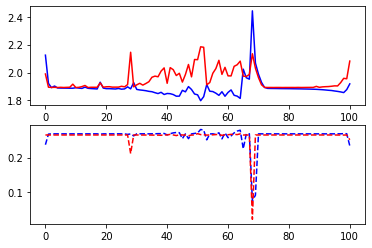

In [ ]:
plt.subplot(211)
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

plt.subplot(212)
plt.plot(history.history['accuracy'], '--b')
plt.plot(history.history['val_accuracy'], '--r')